# Data visualization:
***

## 1. Import libraries

In [ ]:

import nbimporter
from LSTM_GloVE import kaggle_toxic_preprocess

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from collections import Counter, OrderedDict
import random
from wordcloud import WordCloud
from pprint import pprint

In [2]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

## 2. Preprocessing data

In [18]:
preprocess_params = {
    'csv_name':'input/jigsaw-toxic-comment-classification-challenge/train.csv.zip',
    'test_size': 0.4,
    'rows': 0,
    'negative_percent_drop': 0,
}

In [19]:
x_train , x_val , y_train , y_val = kaggle_toxic_preprocess(**preprocess_params)

In [20]:
x =[*x_train, *x_val]
y = [*y_train, *y_val]

## 3. Label statistics

In [21]:
def label_correlation(y, labels):
    fig, ax = plt.subplots(figsize=(8.5, 6))
    corr = np.corrcoef(y,  rowvar=False)
    sns.heatmap(corr, cmap="YlGnBu",
                yticklabels=labels, annot=True, ax=ax)
    
    fig.tight_layout(pad=5.0)
    ax.set_title("Label correlations")
    ax.set_xticklabels(labels)
    plt.show()

In [24]:
def label_statistcs(y, labels):
    statistics = {}
    summa = len(y)
    
    pprint(f'Size of dataset: {summa}')
    
    negative = (lambda label: not any(label))
    statistics['negatives'] = len(list(filter(negative, y)))
    
    for i in range(len(labels)):
        toxic_filter = (lambda label: label[i]==1)
        statistics[labels[i]] = len(list(filter(toxic_filter, y)))
    
    plt.style.use('ggplot')
    fig, (ax1, ax2) = plt.subplots(1,2)

    # Rate of toxic and non-toxic comments
    toxic_labels = ['toxic', 'not toxic']
    toxic_sizes = [summa-statistics['negatives'], statistics['negatives']]
    colors = ["peru", "peachpuff"]

    ax1.pie(toxic_sizes, labels=toxic_labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.set_title('Rate of toxic and non-toxic samples')

    # Distribution of toxic labels
    toxics = {i:statistics[i] for i in statistics if i!='negatives'}
    dist_sizes = [value/(summa-statistics['negatives']) for value in list(toxics.values())]
        
    colors = ["chocolate", "burlywood", "darkgoldenrod", "sandybrown", "sienna", "bisque"]
        
    ax2.pie(dist_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    ax2.set_title('Distribution of toxic labels')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.set_size_inches(10.0, 7.5)

    pprint(statistics, sort_dicts=False)
    
    label_correlation(y, labels)
    
    

'Size of dataset: 159571'
{'negatives': 143346,
 'toxic': 15294,
 'severe_toxic': 1595,
 'obscene': 8449,
 'threat': 478,
 'insult': 7877,
 'identity_hate': 1405}


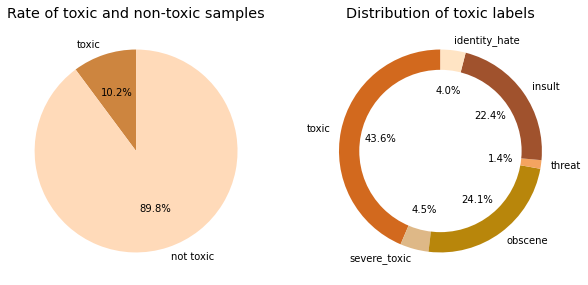

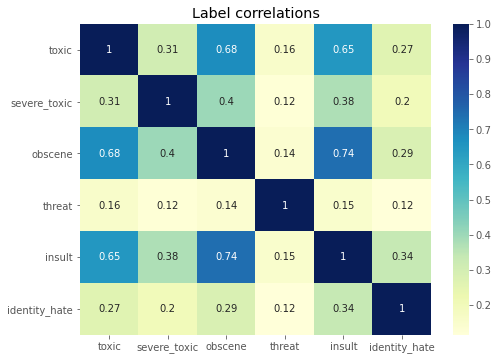

In [25]:
label_statistcs(y, labels)

## 4. Lenght statistics

In [101]:
def calculate_dist(length_list, word_num, kind=''):
    #key=len value=count
    comment_lengths = dict(Counter(length_list))
    
    sentences={}
    for length, count in comment_lengths.items():
        try:
            sentences[length//word_num] += count
        except:
            sentences[length//word_num] = count

    fig, ax = plt.subplots(figsize=(15, 4))
    
    sentences = OrderedDict(sorted(sentences.items()))
    ticks = [i for i in range(max(sentences.keys())+1)]
    
    palette = sns.husl_palette(10)

    
    ax = sns.scatterplot(data=sentences, color=palette[random.randint(0, 9)])
    ax.set_xticks(ticks)
    
    for i, label in enumerate(ax.xaxis.get_ticklabels()):
        if i % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    a = []
    for k, v in sentences.items():
        for i in range(v):
            a.append(k)
    
    median = statistics.median(a)

    plt.plot([median, median], [max(sentences.values()),0], linewidth=1, color='salmon')
    plt.xlim([-2,100])
    
    ax.set_xlabel(f'Number of sentences ({word_num} words/sentence)')
    ax.set_ylabel("Number of comments")
    ax.set_title(f'Distribution of {kind} comment lengths')

In [102]:
def comment_statistics(x, y, labels, word_num):
    comment_lens = []
    for text in x:
        comment_lens.append(len(text))
    
    toxic_lens = []
    for text, label in zip(x,y):
        if (any(label)):
            toxic_lens.append(len(text))
    
    negative_lens = []
    for text, label in zip(x,y):
        if (not any(label)):
            negative_lens.append(len(text))
    
    calculate_dist(comment_lens, word_num)
    calculate_dist(toxic_lens, word_num, 'toxic')
    calculate_dist(negative_lens, word_num, 'negative')


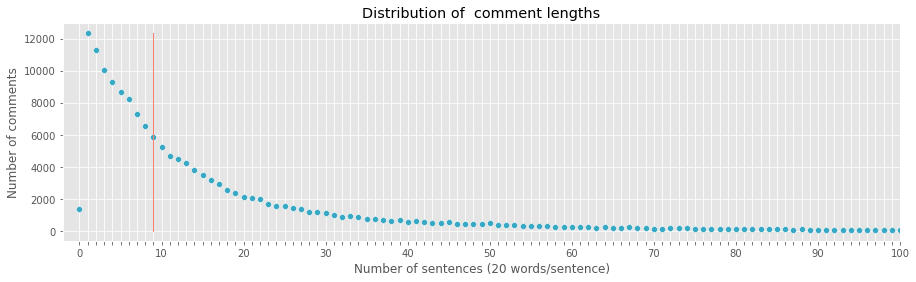

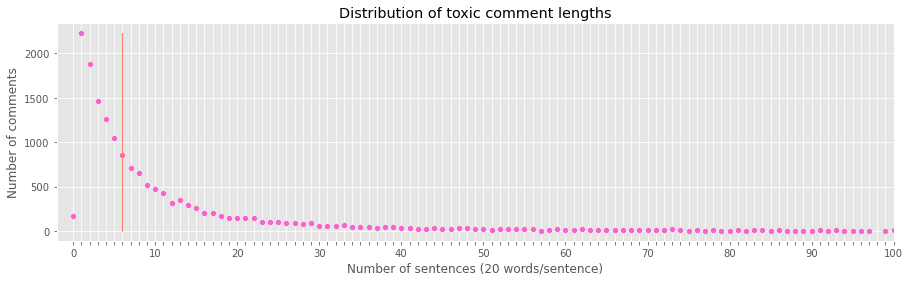

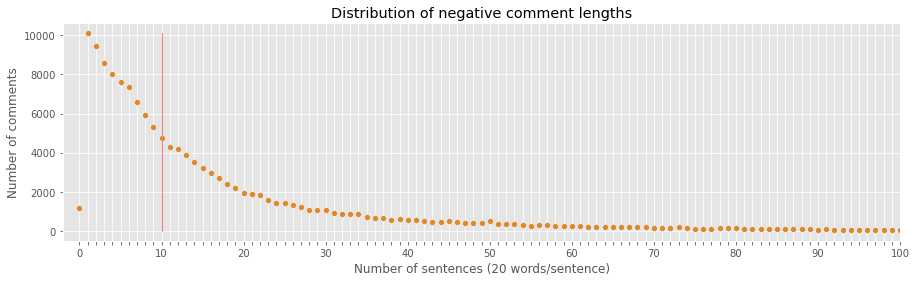

In [106]:
comment_statistics(x, y, labels, 20)

## 5. Word clouds

In [78]:
def word_cloud(x, y, labels):
    
    fig = plt.gcf()
    fig.set_size_inches(15.5, 10.5)
    
    plt.suptitle("Wordclouds of toxic label categories", size='xx-large')
        
    for i in range(len(labels)):
        texts = ''
        toxic_filter = (lambda label: label[i] == 1)
        
        index_list = list(filter(lambda entry: toxic_filter(y[entry]), range(len(y))))
        for f in index_list:
            texts += f' {x[f]}'
        
        word_cloud = WordCloud(width=800, height=800, margin=0).generate(texts)
        
        ax=fig.add_subplot(2, 3, i+1).set_title(f'{labels[i]}')
        plt.plot()
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")

    plt.show()

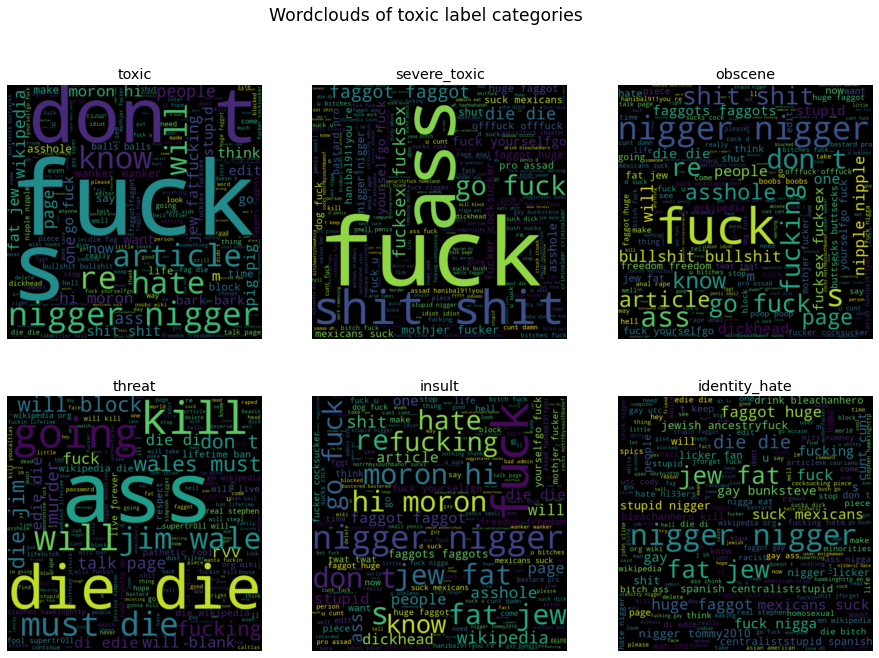

In [79]:
word_cloud(x, y, labels)